__Data Import__

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sales = pd.read_csv('sales.csv')
sales


,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,818829599,3/26/2018,11:19,Male,Park lane,Dallas,No,Groceries,31,4,124,Card,3
996,556589713,2/20/2018,17:17,Male,Water tower,Chicago,Yes,Groceries,3,5,15,Gpay,3
997,82324424,2/6/2018,11:44,Male,Brookfield,NewYork,No,Clothing,71,5,355,Card,3
998,783661702,1/29/2018,15:44,Female,Brookfield,NewYork,No,Clothing,89,7,623,Cash,5


__Which customer spends more member or non-member?__

In [21]:
member_sales = sales.groupby('Member').sum()['Total']
member_sales

Member
No     100245
Yes    107543
Name: Total, dtype: int64

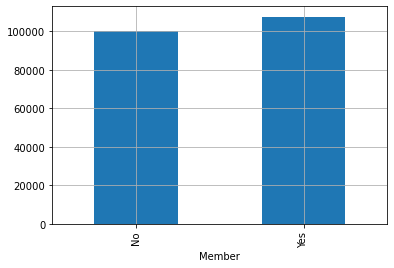

In [22]:
member_sales.plot(kind='bar')
plt.grid()
plt.show()


__Which product line sells more?__

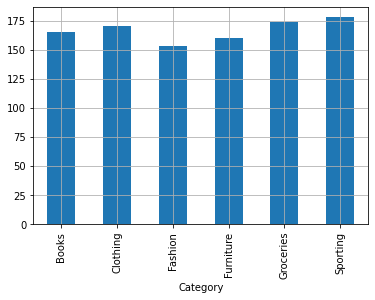

In [23]:
category_sales = sales.groupby('Category').count()['Rating']
category_sales.plot(kind='bar')
plt.grid()
plt.show()

__Which product line is popular in between men vs women?__

In [24]:
sales.groupby(['Gender','Category']).count()['Rating']

Gender  Category 
Female  Books        88
        Clothing     81
        Fashion      81
        Furniture    78
        Groceries    87
        Sporting     86
Male    Books        77
        Clothing     89
        Fashion      72
        Furniture    82
        Groceries    87
        Sporting     92
Name: Rating, dtype: int64

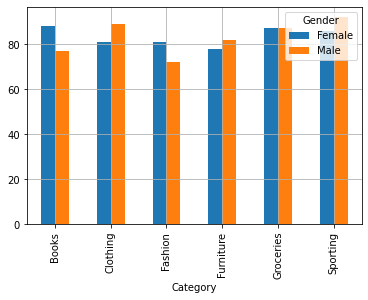

In [25]:
sales_m_w = sales.groupby(['Gender','Category']).count()['Rating']
sales_m_w.unstack(level=0).plot(kind='bar')
plt.grid()
plt.show()

__Which days of the month make most sales?__

In [26]:
sales['Date']

0      1/25/2018
1      3/19/2018
2      2/25/2018
3      1/22/2018
4      2/18/2018
         ...    
995    3/26/2018
996    2/20/2018
997     2/6/2018
998    1/29/2018
999    1/31/2018
Name: Date, Length: 1000, dtype: object

In [27]:
pd.to_datetime(sales['Date']).dt.day

0      25
1      19
2      25
3      22
4      18
       ..
995    26
996    20
997     6
998    29
999    31
Name: Date, Length: 1000, dtype: int64

In [28]:
sales['Day'] = pd.to_datetime(sales['Date']).dt.day
sales.head(10)

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18
5,263634050,3/9/2018,17:55,Male,Brookfield,NewYork,Yes,Clothing,52,4,208,Gpay,3,9
6,99646662,3/4/2018,13:21,Male,Water tower,Chicago,No,Clothing,81,3,243,Cash,4,4
7,188869875,3/8/2018,13:24,Male,Park lane,Dallas,No,Books,80,2,160,Cash,3,8
8,325637547,1/18/2018,15:33,Male,Park lane,Dallas,Yes,Clothing,91,3,273,Card,3,18
9,562942936,2/24/2018,16:05,Female,Park lane,Dallas,No,Books,80,2,160,Cash,4,24


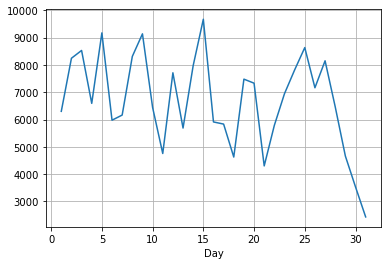

In [29]:
day_sales = sales.groupby('Day').sum()['Total']
day_sales.plot()
plt.grid()
plt.show()

In [30]:
sales['Date']

0      1/25/2018
1      3/19/2018
2      2/25/2018
3      1/22/2018
4      2/18/2018
         ...    
995    3/26/2018
996    2/20/2018
997     2/6/2018
998    1/29/2018
999    1/31/2018
Name: Date, Length: 1000, dtype: object

__Which months make the most sales?__

In [31]:
sales['Month'] = pd.to_datetime(sales['Date']).dt.month

In [32]:
sales.head(10)

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating,Day,Month
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2,25,1
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3,19,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5,25,2
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1,22,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4,18,2
5,263634050,3/9/2018,17:55,Male,Brookfield,NewYork,Yes,Clothing,52,4,208,Gpay,3,9,3
6,99646662,3/4/2018,13:21,Male,Water tower,Chicago,No,Clothing,81,3,243,Cash,4,4,3
7,188869875,3/8/2018,13:24,Male,Park lane,Dallas,No,Books,80,2,160,Cash,3,8,3
8,325637547,1/18/2018,15:33,Male,Park lane,Dallas,Yes,Clothing,91,3,273,Card,3,18,1
9,562942936,2/24/2018,16:05,Female,Park lane,Dallas,No,Books,80,2,160,Cash,4,24,2


In [33]:
sales_month= sales.groupby('Month').sum()['Total']

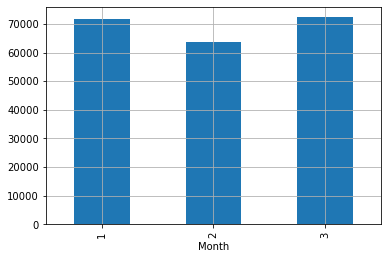

In [19]:
sales_month.plot(kind='bar')
plt.grid()
plt.show()